In [5]:
!pip install numpy
!pip install geomdl
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Displaying the two aligned control curves:


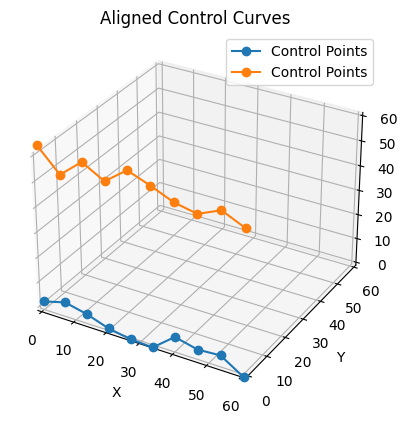

Rendering and saving the original lofted surface using Matplotlib...
Saved original surface image to logging_images/original_surface.png


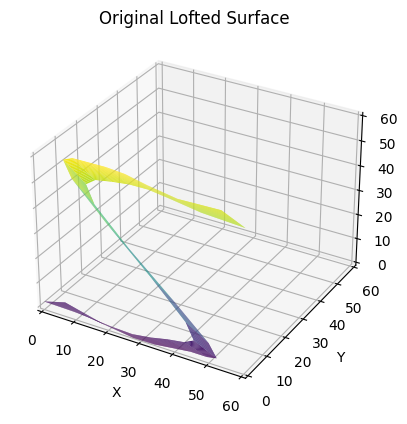

Surface control points (row-major order):
[0.0, 0.0, 2.117942339676694]
[6.666666666666667, 0.0, 4.582765887916013]
[13.333333333333334, 0.0, 2.6077377732757148]
[20.0, 0.0, -0.4313133316482247]
[26.666666666666668, 0.0, -1.9303323283548615]
[33.333333333333336, 0.0, -2.351012240481701]
[40.0, 0.0, 4.881222406655372]
[46.66666666666667, 0.0, 2.7599792086314077]
[53.333333333333336, 0.0, 3.3787941542011186]
[60.0, 0.0, -2.3327192145332276]
[0.0, 0.0, 64.1923903891924]
[6.666666666666667, 0.0, 55.390249931074926]
[13.333333333333334, 0.0, 62.673404070009035]
[20.0, 0.0, 57.84147961897619]
[26.666666666666668, 0.0, 64.44973045854262]
[33.333333333333336, 0.0, 61.152793319091785]
[40.0, 0.0, 57.401418024154005]
[46.66666666666667, 0.0, 55.63491360458139]
[53.333333333333336, 0.0, 59.56532372717455]
[60.0, 0.0, 55.52932528916979]
Rendering and saving Surface rotated by 30° around x-axis...
Saved rotated surface image to logging_images/rotated_surface_30deg_x.png


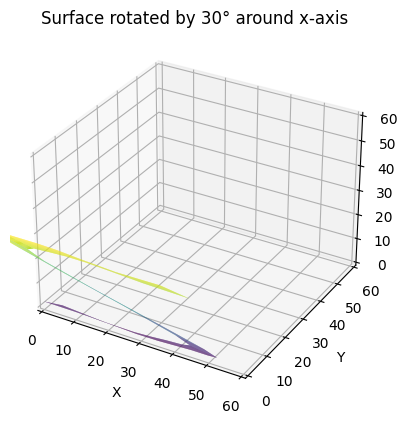

Rendering and saving Surface rotated by 30° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_30deg_y.png


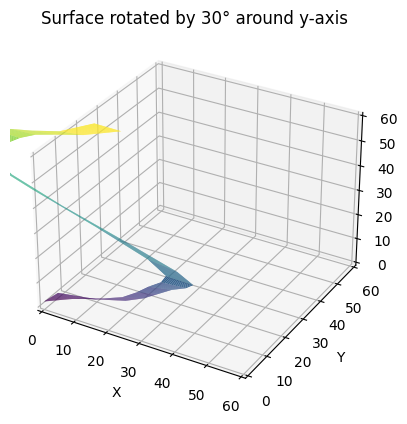

Rendering and saving Surface rotated by 30° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_30deg_z.png


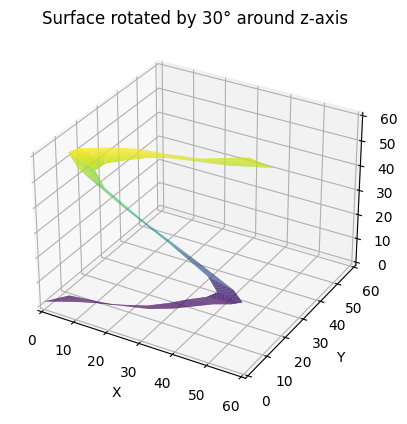

Rendering and saving Surface rotated by 60° around x-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_x.png


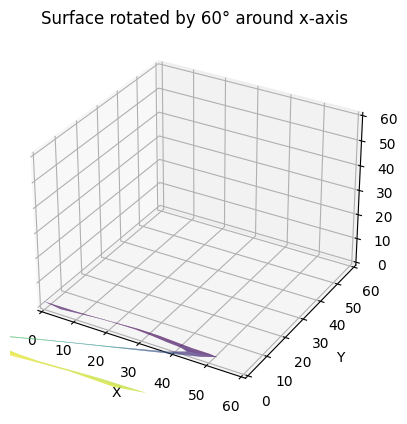

Rendering and saving Surface rotated by 60° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_y.png


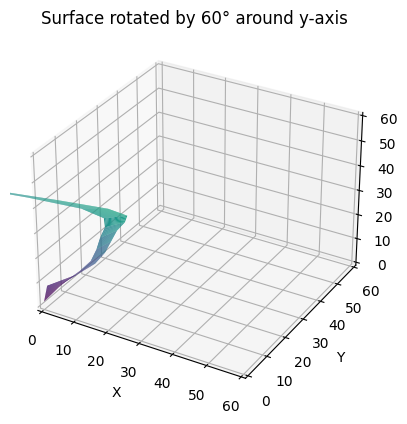

Rendering and saving Surface rotated by 60° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_z.png


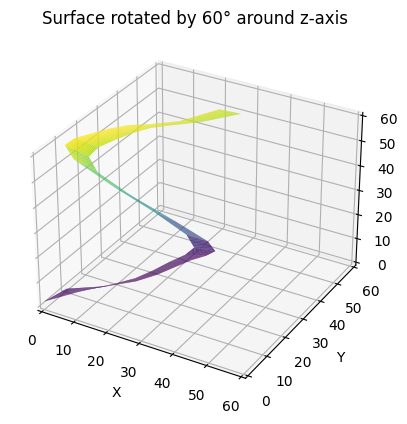

Rendering and saving Surface rotated by 90° around x-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_x.png


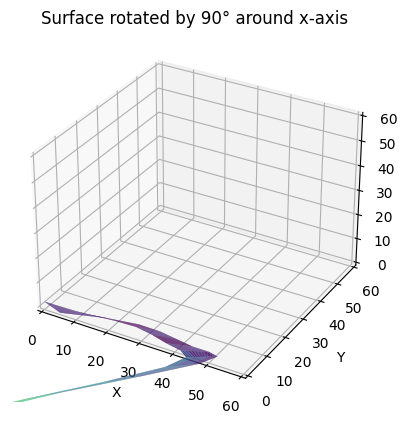

Rendering and saving Surface rotated by 90° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_y.png


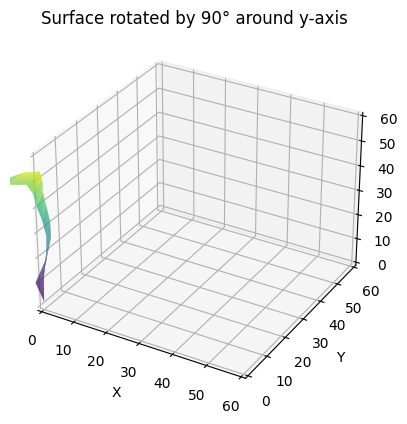

Rendering and saving Surface rotated by 90° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_z.png


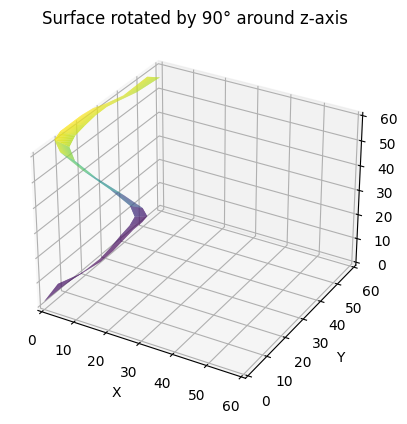

In [6]:
# %matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
from geomdl import BSpline, operations

# -------------------------------
# 1. Helper functions
# -------------------------------

def generate_curve_xz(num_points, x_range=(0, 60), base_z=0, z_variation=5, x_vals=None):
    """
    Generate a list of control points for a curve in the xz plane.
    If x_vals is provided, it is used for the x-coordinates; otherwise, values are generated linearly over x_range.
    The y coordinate is fixed at 0.
    """
    if x_vals is None:
        x_vals = np.linspace(x_range[0], x_range[1], num_points)
    ctrlpts = []
    for x in x_vals:
        z = base_z + np.random.uniform(-z_variation, z_variation)
        ctrlpts.append([x, 0, z])
    return ctrlpts

def create_loft_surface(curve1, curve2, num_points):
    """
    Create a lofted BSpline surface from two curves.
    The surface is built with two rows (one per curve) and num_points columns.
    Degree is 3 along the curve direction (u) and 1 in the lofting direction (v).
    """
    surf = BSpline.Surface()
    surf.degree_u = 3
    surf.degree_v = 1

    # Combine control points (first curve then second curve)
    ctrlpts = curve1 + curve2
    # Here, u-direction is along each curve (num_points) and v-direction is the lofting (2 curves)
    surf.set_ctrlpts(ctrlpts, num_points, 2)
    
    # Create knot vector for u-direction (open/uniform)
    n_ctrlpts_u = num_points
    degree_u = surf.degree_u
    num_internal_knots = n_ctrlpts_u - degree_u - 1
    if num_internal_knots > 0:
        internal_knots = np.linspace(0, 1, num_internal_knots + 2)[1:-1]
    else:
        internal_knots = []
    surf.knotvector_u = [0]*(degree_u+1) + list(internal_knots) + [1]*(degree_u+1)
    
    # Knot vector for v-direction (with 2 control rows and degree 1)
    surf.knotvector_v = [0, 0, 1, 1]
    
    surf.delta = 0.05  # controls evaluation resolution
    return surf

def evaluate_surface(surf):
    """
    Evaluate the BSpline surface and reshape the evaluated points into a grid.
    The grid dimension is computed from the total number of evaluation points.
    """
    surf.evaluate()
    num_eval_points = len(surf.evalpts)
    n = int(np.sqrt(num_eval_points))
    evalpts = np.array(surf.evalpts)
    pts_grid = evalpts.reshape(n, n, 3)
    return pts_grid

def plot_surface(pts_grid, ax=None, title="Surface"):
    """
    Plot a BSpline surface using Matplotlib.
    Axes limits are fixed to [0, 60] in x, y, and z.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    X = pts_grid[:, :, 0]
    Y = pts_grid[:, :, 1]
    Z = pts_grid[:, :, 2]
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 60)
    ax.set_zlim(0, 60)
    return ax

def save_surface_plot(surf, filename, title="Surface"):
    """
    Evaluate the surface, plot it, and save the resulting figure to a file.
    """
    pts_grid = evaluate_surface(surf)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_surface(pts_grid, ax, title)
    plt.savefig(filename)
    plt.close(fig)

def plot_curves(curves, title="Curves"):
    """
    Plot one or more curves (each a list of 3D points) in a 3D plot.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for curve in curves:
        pts = np.array(curve)
        ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], marker='o', label="Control Points")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 60)
    ax.set_zlim(0, 60)
    plt.legend()
    plt.show()

# -------------------------------
# 2. Code execution in a single cell
# -------------------------------

# Create logging directory if it does not exist
log_dir = "logging_images"
os.makedirs(log_dir, exist_ok=True)

num_points = 10
# Generate common x-values so that both curves are aligned along the x-axis
x_vals = np.linspace(0, 60, num_points)
curve1_ctrlpts = generate_curve_xz(num_points, base_z=0, z_variation=5, x_vals=x_vals)
curve2_ctrlpts = generate_curve_xz(num_points, base_z=60, z_variation=5, x_vals=x_vals)

# Display the two aligned control curves
print("Displaying the two aligned control curves:")
plot_curves([curve1_ctrlpts, curve2_ctrlpts], title="Aligned Control Curves")

# Create the lofted surface from the two curves
surf = create_loft_surface(curve1_ctrlpts, curve2_ctrlpts, num_points)

# Save and display the original lofted surface
print("Rendering and saving the original lofted surface using Matplotlib...")
orig_filename = os.path.join(log_dir, "original_surface.png")
save_surface_plot(surf, orig_filename, title="Original Lofted Surface")
print(f"Saved original surface image to {orig_filename}")

pts_grid = evaluate_surface(surf)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_surface(pts_grid, ax, title="Original Lofted Surface")
plt.show()

print("Surface control points (row-major order):")
for pt in surf.ctrlpts:
    print(pt)

# Rotate the surface in multiple directions, then save and display each rotated surface
rotation_angles = [30, 60, 90]
rotation_axes = ['x', 'y', 'z']
axis_mapping = {'x': 0, 'y': 1, 'z': 2}

for angle in rotation_angles:
    for axis in rotation_axes:
        int_axis = axis_mapping[axis]
        rotated_surf = operations.rotate(surf, angle=angle, axis=int_axis)
        rotated_surf.delta = 0.05
        filename = os.path.join(log_dir, f"rotated_surface_{angle}deg_{axis}.png")
        title = f"Surface rotated by {angle}° around {axis}-axis"
        print(f"Rendering and saving {title}...")
        save_surface_plot(rotated_surf, filename, title)
        print(f"Saved rotated surface image to {filename}")
        
        pts_grid_rot = evaluate_surface(rotated_surf)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        plot_surface(pts_grid_rot, ax, title=title)
        plt.show()


Displaying the two control curves:


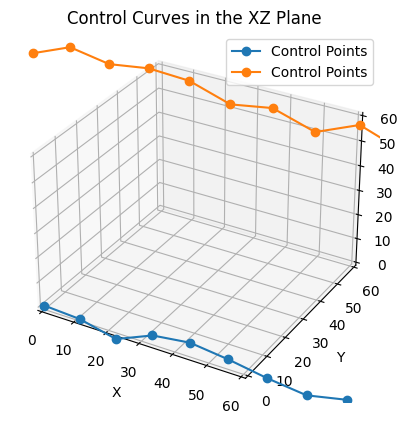

Rendering and saving the original lofted surface using Matplotlib...
Saved original surface image to logging_images/original_surface.png


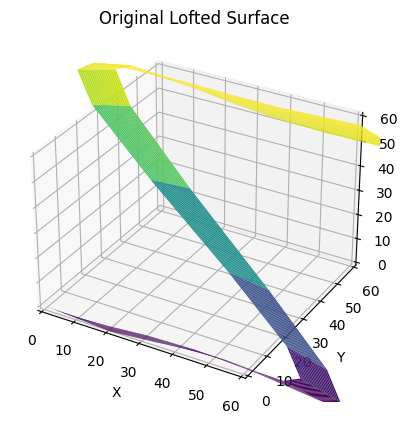

Surface control points (in row-major order):
[0.0, 0.0, 0.4125095456392671]
[11.11111111111111, 0.0, -0.427626766531791]
[22.22222222222222, 0.0, -3.843997015414611]
[33.33333333333333, 0.0, 2.5653130368787185]
[44.44444444444444, 0.0, 4.54552536077383]
[55.55555555555556, 0.0, 2.787984284303919]
[66.66666666666666, 0.0, 0.30145003037370355]
[77.77777777777777, 0.0, -1.4178775215479247]
[88.88888888888889, 0.0, 2.0189532016350213]
[100.0, 0.0, -4.848817778603033]
[0.0, 0.0, 98.30738106830243]
[11.11111111111111, 0.0, 103.99128129574373]
[22.22222222222222, 0.0, 101.53006877826284]
[33.33333333333333, 0.0, 103.63043769180175]
[44.44444444444444, 0.0, 102.91474888339289]
[55.55555555555556, 0.0, 98.40206030786781]
[66.66666666666666, 0.0, 100.88905447424116]
[77.77777777777777, 0.0, 96.473696779784]
[88.88888888888889, 0.0, 102.76107296457617]
[100.0, 0.0, 97.58675799048216]
Rendering and saving Surface rotated by 30° around x-axis...
Saved rotated surface image to logging_images/rotated

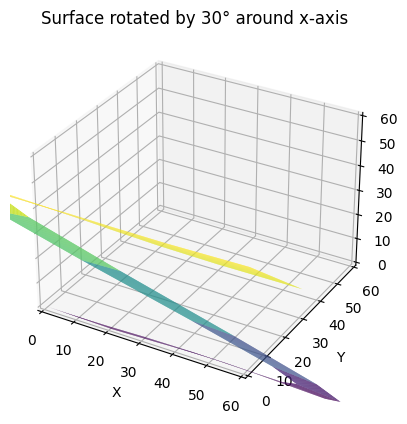

Rendering and saving Surface rotated by 30° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_30deg_y.png


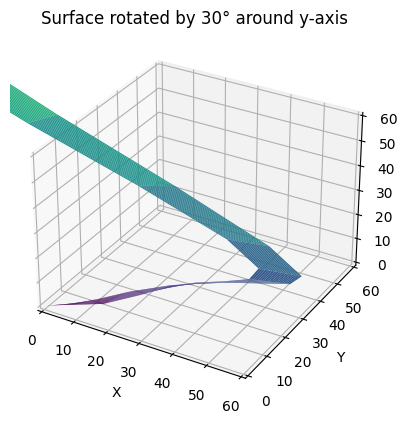

Rendering and saving Surface rotated by 30° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_30deg_z.png


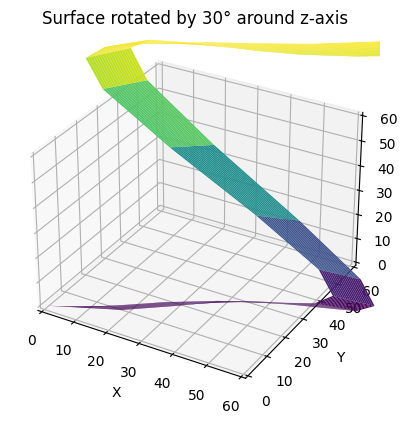

Rendering and saving Surface rotated by 60° around x-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_x.png


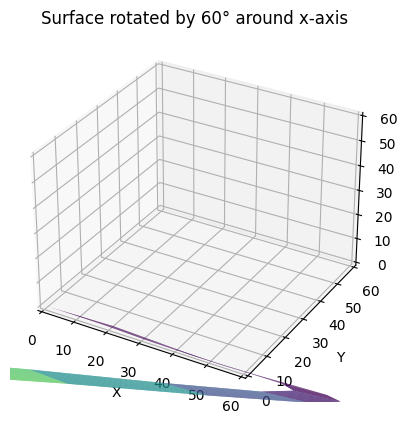

Rendering and saving Surface rotated by 60° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_y.png


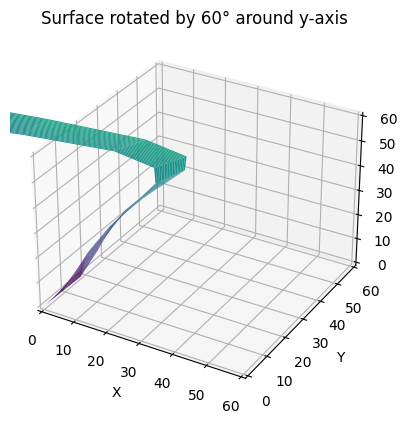

Rendering and saving Surface rotated by 60° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_60deg_z.png


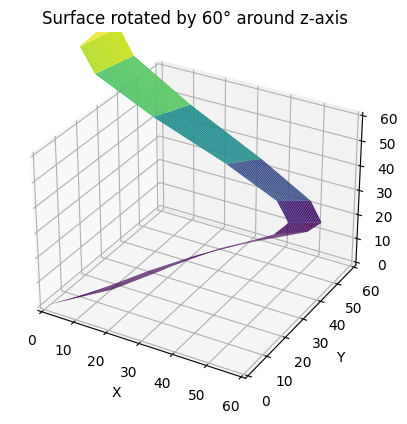

Rendering and saving Surface rotated by 90° around x-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_x.png


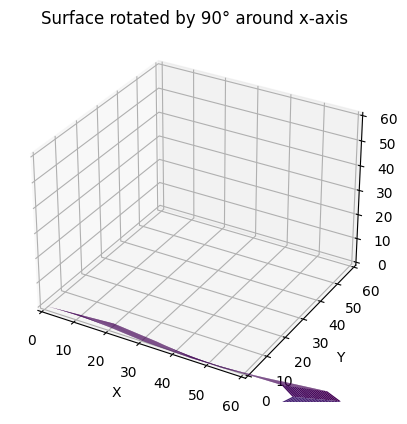

Rendering and saving Surface rotated by 90° around y-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_y.png


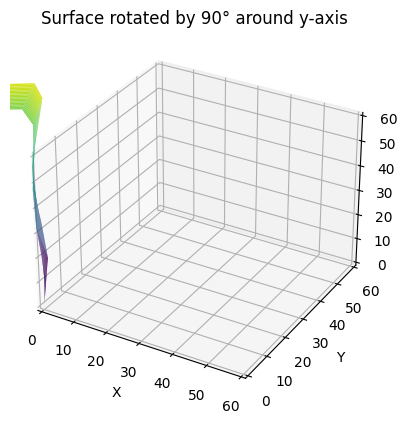

Rendering and saving Surface rotated by 90° around z-axis...
Saved rotated surface image to logging_images/rotated_surface_90deg_z.png


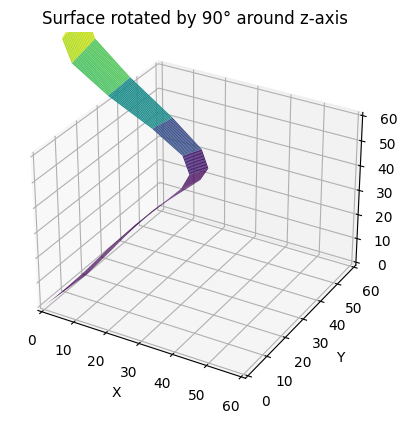

In [7]:
# Create logging directory if it does not exist
log_dir = "logging_images"
os.makedirs(log_dir, exist_ok=True)

# Number of control points per curve
num_points = 10

# Generate two curves in the xz plane
curve1_ctrlpts = generate_curve_xz(num_points, x_range=(0, 100), base_z=0, z_variation=5)
curve2_ctrlpts = generate_curve_xz(num_points, x_range=(0, 100), base_z=100, z_variation=5)

# Display the curves in the notebook
print("Displaying the two control curves:")
plot_curves([curve1_ctrlpts, curve2_ctrlpts], title="Control Curves in the XZ Plane")

# Create the lofted BSpline surface from the two curves
surf = create_loft_surface(curve1_ctrlpts, curve2_ctrlpts, num_points)

# Save and display the original lofted surface using Matplotlib
print("Rendering and saving the original lofted surface using Matplotlib...")
orig_filename = os.path.join(log_dir, "original_surface.png")
save_surface_plot(surf, orig_filename, title="Original Lofted Surface")
print(f"Saved original surface image to {orig_filename}")

# Display the evaluated original surface in the notebook
pts_grid = evaluate_surface(surf)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_surface(pts_grid, ax, title="Original Lofted Surface")
plt.show()

# Print control points (row-major order)
print("Surface control points (in row-major order):")
for pt in surf.ctrlpts:
    print(pt)

# Rotate the surface in multiple directions, save, and display each rotated surface
rotation_angles = [30, 60, 90]  # angles in degrees
rotation_axes = ['x', 'y', 'z']  # axes labels
axis_mapping = {'x': 0, 'y': 1, 'z': 2}

for angle in rotation_angles:
    for axis in rotation_axes:
        int_axis = axis_mapping[axis]
        # Rotate the surface using geomdl's operations.rotate
        rotated_surf = operations.rotate(surf, angle=angle, axis=int_axis)
        rotated_surf.delta = 0.05  # ensure evaluation resolution
        filename = os.path.join(log_dir, f"rotated_surface_{angle}deg_{axis}.png")
        title = f"Surface rotated by {angle}° around {axis}-axis"
        print(f"Rendering and saving {title}...")
        save_surface_plot(rotated_surf, filename, title)
        print(f"Saved rotated surface image to {filename}")
        
        # Display the rotated surface in the notebook
        pts_grid_rot = evaluate_surface(rotated_surf)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        plot_surface(pts_grid_rot, ax, title=title)
        plt.show()